###  <font color="blue"> The purpose of the work bellow is to create a course recommendation system for students by building a Neural Network model using Keras embeddings and visualize it by reducing the dimesnions using PCA and TSNE.

##  <font color="red"> Loading Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import load_model

Using TensorFlow backend.
/home/majdi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/majdi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/majdi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/majdi/.local/lib/python3.6/site-packages/tensorflow/python/fra

## <font color="red"> Getting Data

I will split the data into a training and testing set and will create two variables for the unique number of users and courses.

In [3]:
dataset = pd.read_csv('/home/majdi/Desktop/Course-Recommendation/data/ratings.csv')
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
n_users = len(dataset.user_id.unique())
n_courses = len(dataset.Course_id.unique())
dataset.head()

,Course_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [5]:
dataset.shape

(981756, 3)

## <font color="red"> What Embedding means

An embedding is a mapping from discrete objects, such as words or ids of courses in our case, to a vector of continuous values. This can be used to find similarities between the discrete objects, that wouldn’t be apparent to the model if it didn’t use embedding layers.

## <font color="red"> Creating Embedding Model

### <font color="gray"> Using Keras deep learning framework it becomes easy to create neural network embeddings and working with multiple input and output layers </font>

Note that we will use user's id which is a number generated by the system, we won't use the real name of the user because of privacy

The structure of the model would be: <br>
<b>Input:</b> course_id and User_id<br>
<b>Embedding Layers:</b> Courses and Users<br>
<b>Dot:</b> Combines Embedding using a Dot Product

In an embedding model, the embeddings are the weights that are learned during training. These embeddings are not only used for extracting information about the data but can also be used to visualize which we will see in the coming steps.

In [5]:
course_input = Input(shape=[1], name="Course-Input")
course_embedding = Embedding(n_courses+1, 5, name="Course-Embedding")(course_input)
course_vec = Flatten(name="Flatten-courses")(course_embedding)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([course_vec, user_vec])
model = Model([user_input, course_input], prod)
model.compile('adam', 'mean_squared_error')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### Training the model

Epoch 1/10
785404/785404 [==============================] - 138s 176us/step - loss: 14.1386
Epoch 2/10
785404/785404 [==============================] - 115s 147us/step - loss: 4.9594
Epoch 3/10
785404/785404 [==============================] - 129s 165us/step - loss: 1.8782
Epoch 4/10
785404/785404 [==============================] - 136s 173us/step - loss: 1.2268
Epoch 5/10
785404/785404 [==============================] - 113s 143us/step - loss: 0.9705
Epoch 6/10
785404/785404 [==============================] - 117s 149us/step - loss: 0.8397
Epoch 7/10
785404/785404 [==============================] - 106s 136us/step - loss: 0.7642
Epoch 8/10
785404/785404 [==============================] - 138s 176us/step - loss: 0.7174
Epoch 9/10
785404/785404 [==============================] - 116s 147us/step - loss: 0.6865
Epoch 10/10
785404/785404 [==============================] - 121s 154us/step - loss: 0.6650


Text(0, 0.5, 'Training Error')

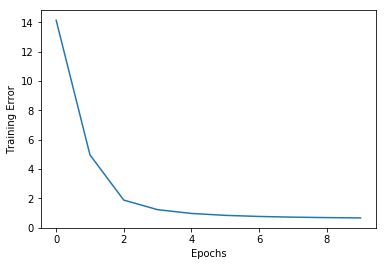

In [15]:
if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.Course_id], train.rating, epochs=10, verbose=1)
    model.save('regression_model.h5')
    
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [16]:
test_predict = model.predict([test.user_id,test.Course_id])
test['predicted_rating'] = test_predict
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Course_id,user_id,rating,predicted_rating
646451,6495,19643,5,5.436918
614851,6175,8563,4,3.974255
974393,9920,52110,3,3.755869
21471,215,33864,5,4.114410
272540,2728,16587,3,3.665735


### Visualizing Embeddings

#### Extract Embeddings

To visualize these concepts, we need to further reduce dimensionality using dimensionality reduction techniques like principal component analysis (PSA) or t-distributed stochastic neighbor embedding (TSNE).

Starting with 10000 dimensions (one for each course), we map them to 5 dimensions using embedding and then further map them to 2 dimensions using PCA or TSNE.

In [19]:
course_emb = model.get_layer('Course-Embedding')
course_emb_weights = course_emb.get_weights()[0]

#### Reducing dimensionality using PCA

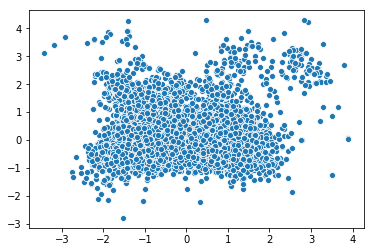

In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(course_emb_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

#### Reducing dimensionality using PCA

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.023s...
[t-SNE] Computed neighbors for 10001 samples in 0.624s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.163199
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.044800
[t-SNE] KL

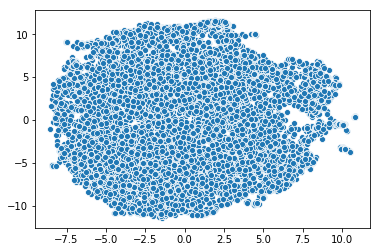

In [23]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(course_emb_weights)
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

## Let's make a recommendation

We need to feed in a user and all courses and then select the courses which have the highest predicted ratings for that specific user. <br> The code below shows the process of making predictions for a first user:

In [24]:
course_data = np.array(list(set(dataset.Course_id)))
user = np.array([1 for i in range(len(course_data))])

In [25]:
predictions = model.predict([user, course_data])
predictions = np.array([a[0] for a in predictions])
recommended_course_ids = (-predictions).argsort()[:5]
print(recommended_course_ids)

[8945 9010 7843 8335 8853]


In [26]:
print(predictions[recommended_course_ids])

[5.70515   5.284419  5.2675095 5.2308693 5.2190557]


We can use the course ids to get more information about the course using the course.csv file.

In [53]:
colnames=['id','best_course_id','courses_count','language_code','average_rating']
courses = pd.read_csv('/home/majdi/Desktop/Course-Recommendation/data/courses.csv',index_col=False)
courses = courses.dropna(axis='columns', how='all')
courses.head()
courses[courses['id'].isin(recommended_course_ids)]

,id,recommended_course_id,course_language,Unnamed: 23,Unnamed: 24,Unnamed: 25
7842,7843,17182421,Arabic,NaN,NaN,NaN
8334,8335,18090150,English,NaN,NaN,NaN
8852,8853,168569,English,NaN,NaN,NaN
8944,8945,32529,Arabic,NaN,NaN,NaN
9009,9010,71869,Arabic,NaN,NaN,NaN
